# CHANDIGARH

In [114]:
import pandas as pd

# Load the datasets for Chandigarh
df_ch_enrolment = pd.read_csv('/content/Chandigarh Enrolment state.csv')
df_ch_demographic = pd.read_csv('/content/Chandigarh Demographic state.csv')
df_ch_biometric = pd.read_csv('/content/Chandigarh Biometric state.csv')

print("Chandigarh Enrolment Dataset:")
print(df_ch_enrolment.head())
print(df_ch_enrolment.info())
print(df_ch_enrolment.describe())

print("\nChandigarh Demographic Dataset:")
print(df_ch_demographic.head())
print(df_ch_demographic.info())
print(df_ch_demographic.describe())

print("\nChandigarh Biometric Dataset:")
print(df_ch_biometric.head())
print(df_ch_biometric.info())
print(df_ch_biometric.describe())

Chandigarh Enrolment Dataset:
         date       state    district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Chandigarh  Chandigarh   160002        1         0   
1  01-09-2025  Chandigarh  Chandigarh   160030        2         0   
2  01-09-2025  Chandigarh  Chandigarh   160036        2         0   
3  02-09-2025  Chandigarh  Chandigarh   160022        2         0   
4  02-09-2025  Chandigarh  Chandigarh   160047        2         0   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1023 non-null   object
 1   state           1023 non-null   object
 2   district        1023 non-null   object
 3   pincode         1023 non-null   int64 
 4   age_0_5         1023 non-null   int64 
 5   age_5_17        

In [115]:
df_ch_enrolment['date'] = pd.to_datetime(df_ch_enrolment['date'], format='%d-%m-%Y')
df_ch_demographic['date'] = pd.to_datetime(df_ch_demographic['date'], format='%d-%m-%Y')
df_ch_biometric['date'] = pd.to_datetime(df_ch_biometric['date'], format='%d-%m-%Y')

merged_ch_df_temp = pd.merge(df_ch_enrolment, df_ch_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_ch_merged = pd.merge(merged_ch_df_temp, df_ch_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_ch_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_ch_merged[numeric_cols] = df_ch_merged[numeric_cols].fillna(0)

print("Data types after date conversion for df_ch_enrolment:")
print(df_ch_enrolment.info())
print("\nData types after date conversion for df_ch_demographic:")
print(df_ch_demographic.info())
print("\nData types after date conversion for df_ch_biometric:")
print(df_ch_biometric.info())

print("\nMerged Chandigarh DataFrame (df_ch_merged) head:")
print(df_ch_merged.head())
print("\nMerged Chandigarh DataFrame (df_ch_merged) info:")
print(df_ch_merged.info())
print("\nMerged Chandigarh DataFrame (df_ch_merged) describe:")
print(df_ch_merged.describe())

Data types after date conversion for df_ch_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1023 non-null   datetime64[ns]
 1   state           1023 non-null   object        
 2   district        1023 non-null   object        
 3   pincode         1023 non-null   int64         
 4   age_0_5         1023 non-null   int64         
 5   age_5_17        1023 non-null   int64         
 6   age_18_greater  1023 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 56.1+ KB
None

Data types after date conversion for df_ch_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2223 non-nul

In [116]:
df_ch = df_ch_merged[df_ch_merged['state'] == 'Chandigarh'].copy()
df_ch['year'] = df_ch['date'].dt.year
df_ch['month'] = df_ch['date'].dt.month

print("Shape of df_ch:", df_ch.shape)
print("\nFirst 5 rows of df_ch with new 'year' and 'month' columns:")
print(df_ch.head())

Shape of df_ch: (5289, 13)

First 5 rows of df_ch with new 'year' and 'month' columns:
        date       state    district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Chandigarh  Chandigarh   160001      0.0       0.0   
1 2025-03-01  Chandigarh  Chandigarh   160002      0.0       0.0   
2 2025-03-01  Chandigarh  Chandigarh   160003      0.0       0.0   
3 2025-03-01  Chandigarh  Chandigarh   160009      0.0       0.0   
4 2025-03-01  Chandigarh  Chandigarh   160011      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           11.0          62.0           0.0          0.0   
1             0.0           93.0         588.0         259.0        256.0   
2             0.0           31.0         149.0          64.0         59.0   
3             0.0            0.0           0.0          26.0         27.0   
4             0.0           20.0         109.0          31.0         26.0   

   year  month  
0  2025      3  
1  2025

In [117]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_ch_agg = df_ch.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_ch_agg) head:")
print(df_ch_agg.head())
print("\nAggregated DataFrame (df_ch_agg) info:")
print(df_ch_agg.info())

Aggregated DataFrame (df_ch_agg) head:
   year  month       state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chandigarh  Chandigarh      0.0       0.0             0.0   
1  2025      4  Chandigarh  Chandigarh     86.0      21.0            10.0   
2  2025      5  Chandigarh  Chandigarh      0.0       0.0             0.0   
3  2025      5  Chandigarh    Rupnagar      0.0       0.0             0.0   
4  2025      6  Chandigarh  Chandigarh    376.0      64.0             7.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0         1172.0        7921.0        3053.0       3377.0  
1         2731.0        7773.0        4587.0       3334.0  
2         1425.0        6135.0        4483.0       4771.0  
3            0.0           0.0           1.0          5.0  
4          663.0        5313.0        2259.0       3764.0  

Aggregated DataFrame (df_ch_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 colum

In [118]:
import numpy as np

# 1. Create 'totalenrolments' column
df_ch_agg['totalenrolments'] = df_ch_agg['age_0_5'] + df_ch_agg['age_5_17'] + df_ch_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_ch_agg['childenrolments'] = df_ch_agg['age_0_5'] + df_ch_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_ch_agg['totaldemoupdates'] = df_ch_agg['demo_age_5_17'] + df_ch_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_ch_agg['totalbioupdates'] = df_ch_agg['bio_age_5_17'] + df_ch_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_ch_agg['CES'] = np.where(
    df_ch_agg['totalenrolments'] == 0,
    0,
    df_ch_agg['childenrolments'] / df_ch_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_ch_agg['DUR'] = np.where(
    df_ch_agg['totalenrolments'] == 0,
    0,
    df_ch_agg['totaldemoupdates'] / df_ch_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_ch_agg['BUR'] = np.where(
    df_ch_agg['totalenrolments'] == 0,
    0,
    df_ch_agg['totalbioupdates'] / df_ch_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_ch_agg) with new metrics head:")
print(df_ch_agg.head())

Aggregated DataFrame (df_ch_agg) with new metrics head:
   year  month       state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chandigarh  Chandigarh      0.0       0.0             0.0   
1  2025      4  Chandigarh  Chandigarh     86.0      21.0            10.0   
2  2025      5  Chandigarh  Chandigarh      0.0       0.0             0.0   
3  2025      5  Chandigarh    Rupnagar      0.0       0.0             0.0   
4  2025      6  Chandigarh  Chandigarh    376.0      64.0             7.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0         1172.0        7921.0        3053.0       3377.0              0.0   
1         2731.0        7773.0        4587.0       3334.0            117.0   
2         1425.0        6135.0        4483.0       4771.0              0.0   
3            0.0           0.0           1.0          5.0              0.0   
4          663.0        5313.0        2259.0       3764.0            447.0   

   childenro

In [119]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_ch_agg['Enorm'] = df_ch_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_ch_agg['Dnorm'] = df_ch_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_ch_agg['Bnorm'] = df_ch_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_ch_agg['stdnorm'] = (df_ch_agg['Enorm'] + df_ch_agg['Dnorm'] + df_ch_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_ch_agg['ALBI'] = 1 - df_ch_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_ch_agg['ALBI'] = df_ch_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_ch_agg) with normalized metrics and ALBI head:")
print(df_ch_agg.head())

Aggregated DataFrame (df_ch_agg) with normalized metrics and ALBI head:
   year  month       state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chandigarh  Chandigarh      0.0       0.0             0.0   
1  2025      4  Chandigarh  Chandigarh     86.0      21.0            10.0   
2  2025      5  Chandigarh  Chandigarh      0.0       0.0             0.0   
3  2025      5  Chandigarh    Rupnagar      0.0       0.0             0.0   
4  2025      6  Chandigarh  Chandigarh    376.0      64.0             7.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0         1172.0        7921.0        3053.0  ...            9093.0   
1         2731.0        7773.0        4587.0  ...           10504.0   
2         1425.0        6135.0        4483.0  ...            7560.0   
3            0.0           0.0           1.0  ...               0.0   
4          663.0        5313.0        2259.0  ...            5976.0   

   totalbioupdates      CES        DUR

In [120]:
df_ch_agg['Enormrisk'] = 1 - df_ch_agg['Enorm']
df_ch_agg['CESrisknorm'] = 1 - df_ch_agg['CES']
df_ch_agg['DURrisknorm'] = 1 - df_ch_agg['DUR']
df_ch_agg['BURrisknorm'] = 1 - df_ch_agg['BUR']
df_ch_agg['ALBIrisknorm'] = 1 - df_ch_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_ch_agg['riskscore'] = (
    df_ch_agg['Enormrisk'] +
    df_ch_agg['CESrisknorm'] +
    df_ch_agg['DURrisknorm'] +
    df_ch_agg['BURrisknorm'] +
    df_ch_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_ch_agg) with risk components and riskscore head:")
print(df_ch_agg.head())

Aggregated DataFrame (df_ch_agg) with risk components and riskscore head:
   year  month       state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chandigarh  Chandigarh      0.0       0.0             0.0   
1  2025      4  Chandigarh  Chandigarh     86.0      21.0            10.0   
2  2025      5  Chandigarh  Chandigarh      0.0       0.0             0.0   
3  2025      5  Chandigarh    Rupnagar      0.0       0.0             0.0   
4  2025      6  Chandigarh  Chandigarh    376.0      64.0             7.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0         1172.0        7921.0        3053.0  ...  0.865670  0.197736   
1         2731.0        7773.0        4587.0  ...  1.000000  0.243602   
2         1425.0        6135.0        4483.0  ...  0.719726  0.284607   
3            0.0           0.0           1.0  ...  0.000000  0.000123   
4          663.0        5313.0        2259.0  ...  0.568926  0.185216   

    stdnorm      ALBI  E

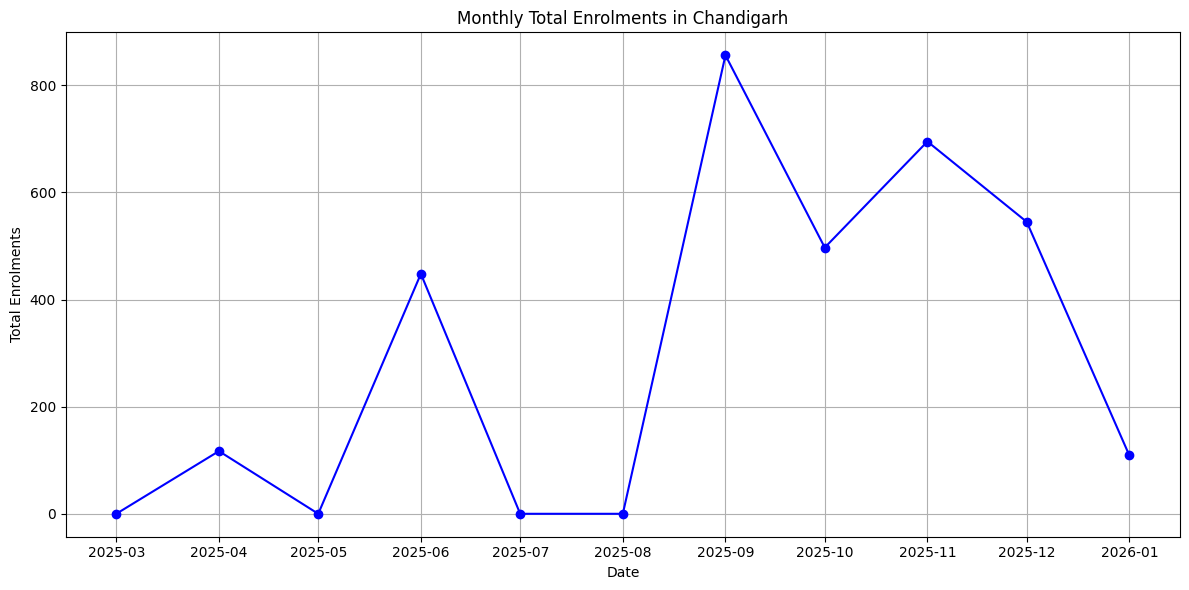

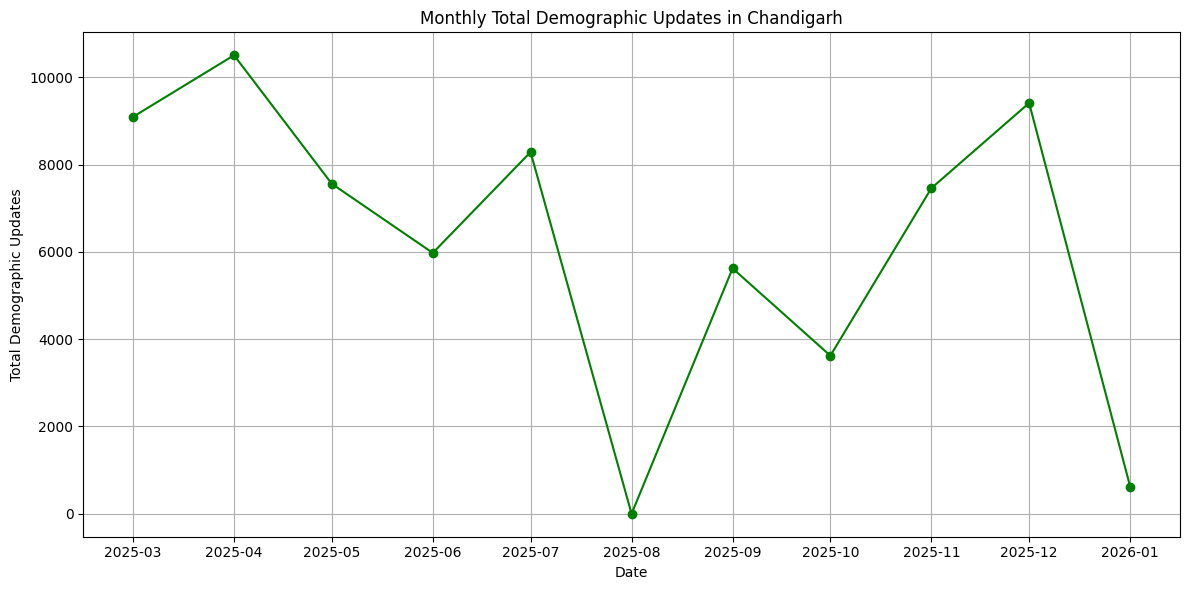

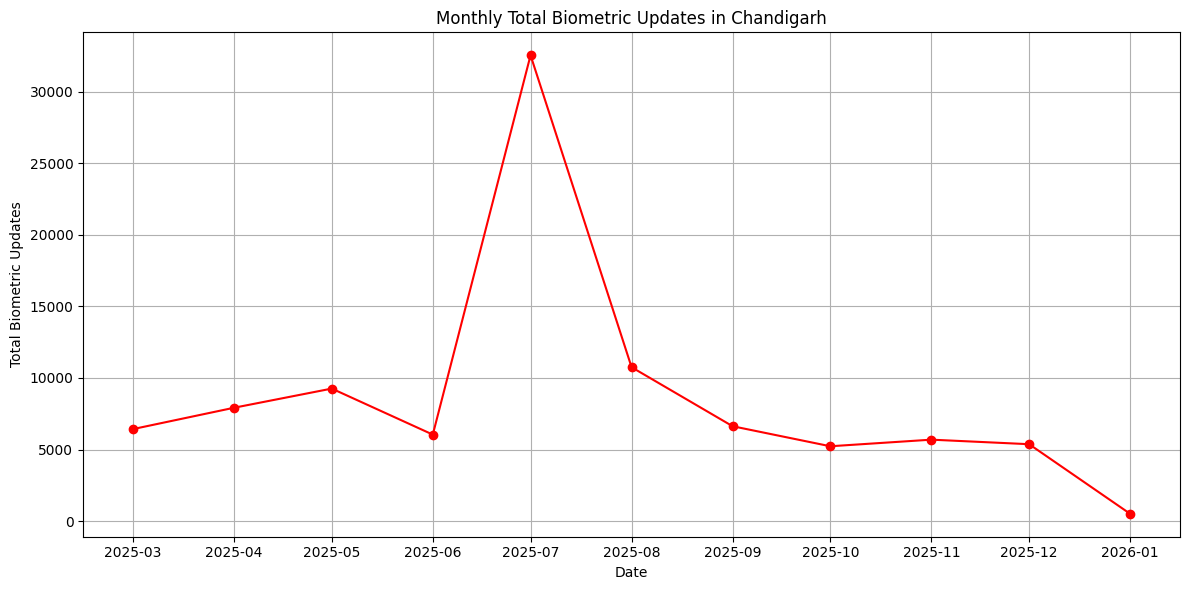

Monthly trend plots generated successfully.


In [121]:
import matplotlib.pyplot as plt

df_ch_monthly_trends = df_ch_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_ch_monthly_trends['date'] = pd.to_datetime(df_ch_monthly_trends['year'].astype(str) + '-' + df_ch_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_ch_monthly_trends = df_ch_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ch_monthly_trends['date'], df_ch_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Chandigarh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ch_monthly_trends['date'], df_ch_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Chandigarh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ch_monthly_trends['date'], df_ch_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Chandigarh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

### UNIVARIATE ANALYSIS

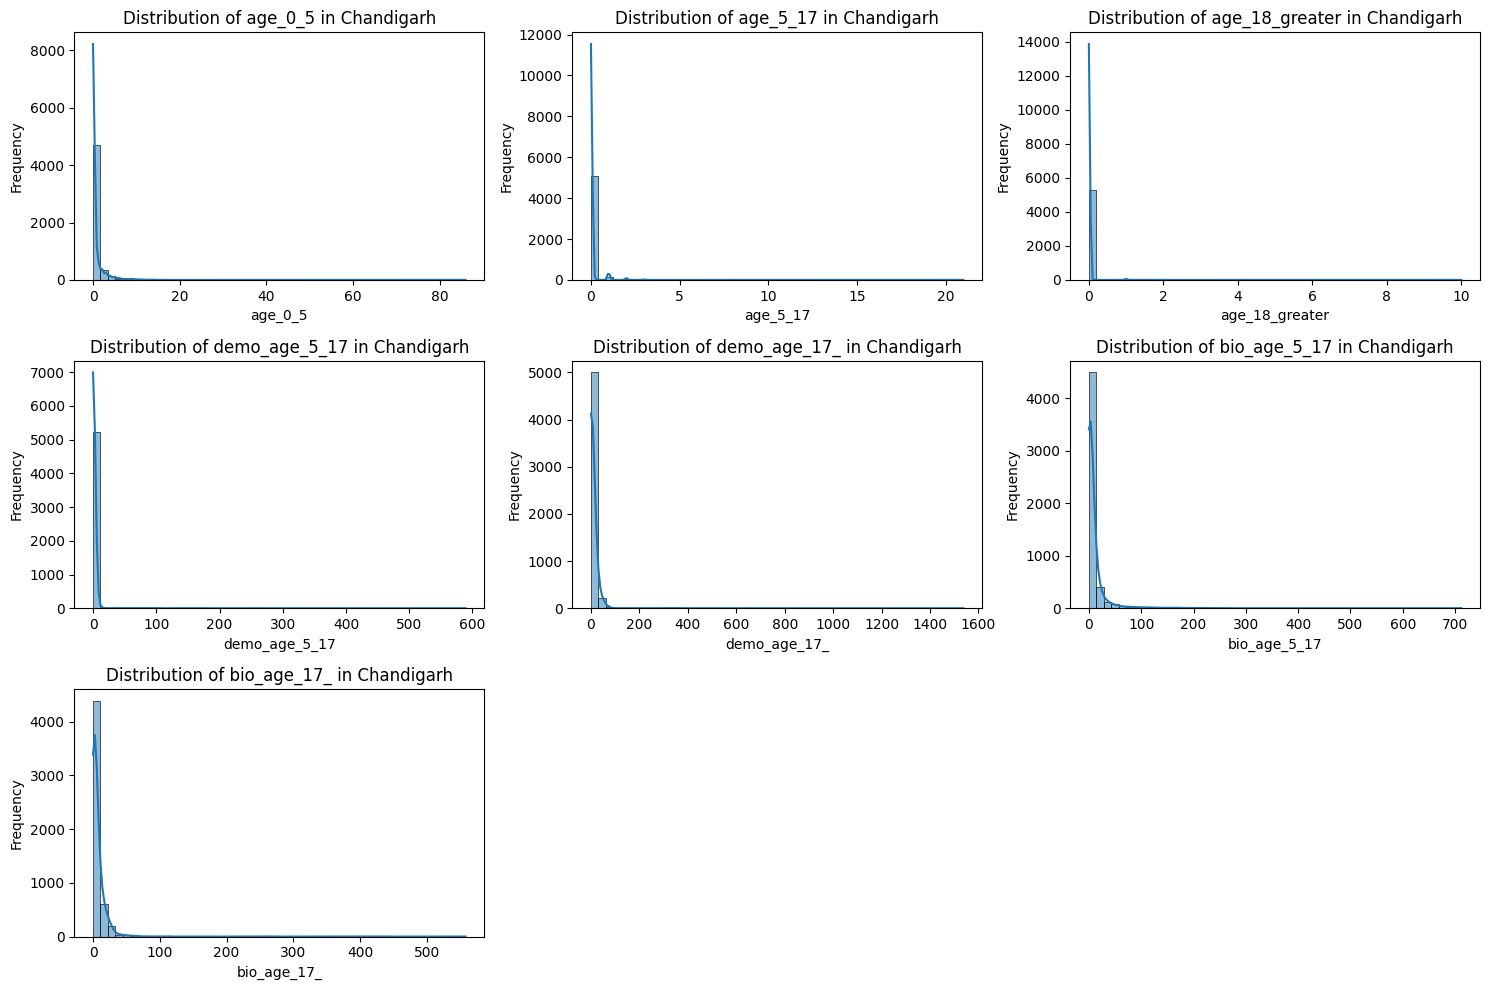

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_ch_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Chandigarh')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

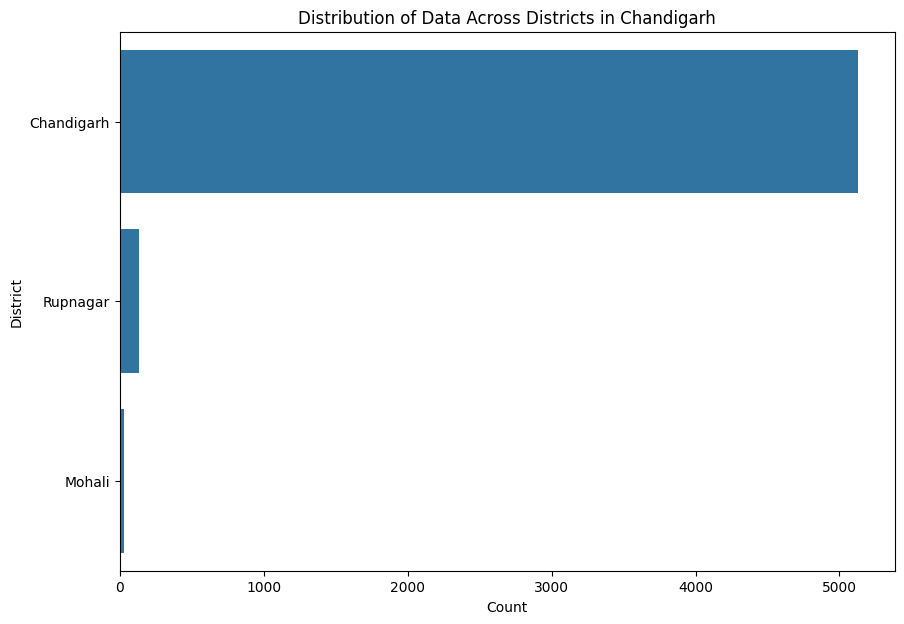

Histograms for numerical age-related columns and count plot for 'district' displayed for Chandigarh.


In [132]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_ch_merged, y='district', order=df_ch_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Chandigarh')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Chandigarh.")

### BIVARIATE AND TRIVARIATE ANALYSIS

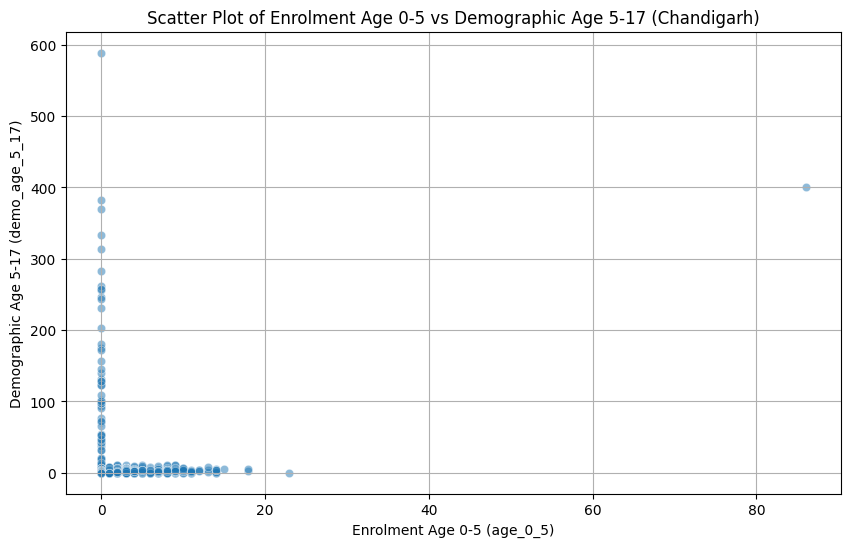

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Chandigarh.


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ch_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Chandigarh)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Chandigarh.")

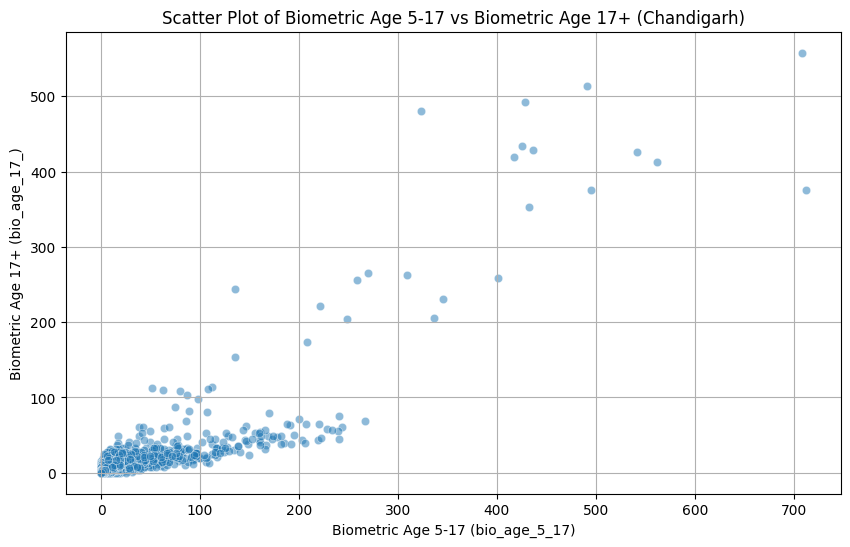

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Chandigarh.


In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ch_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Chandigarh)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Chandigarh.")

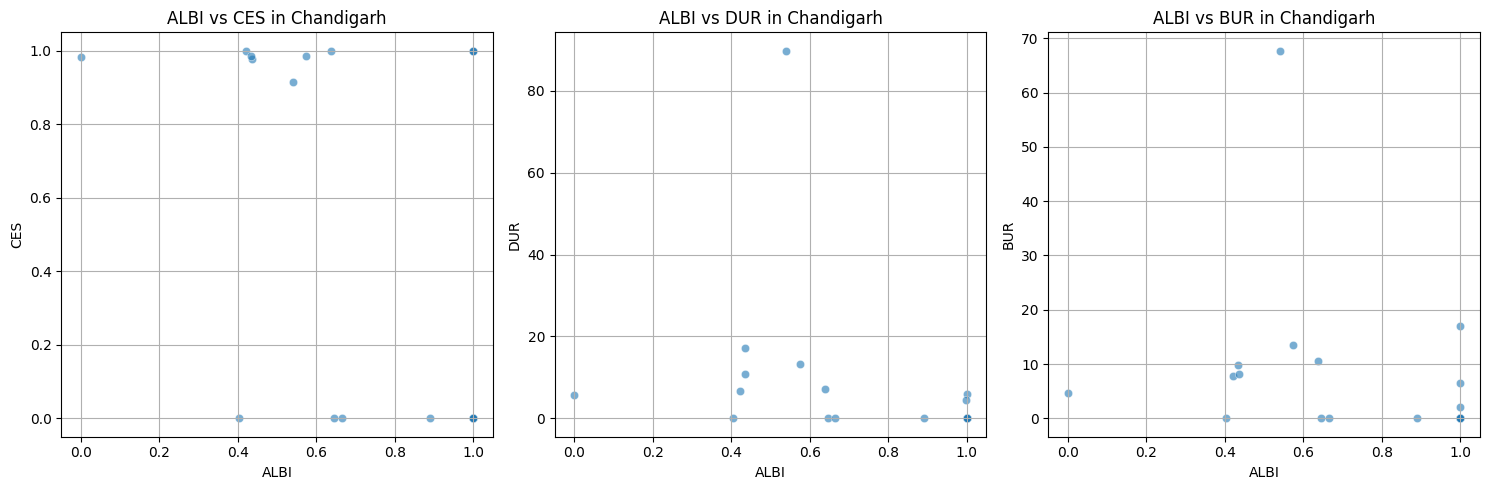

In [135]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_ch_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Chandigarh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

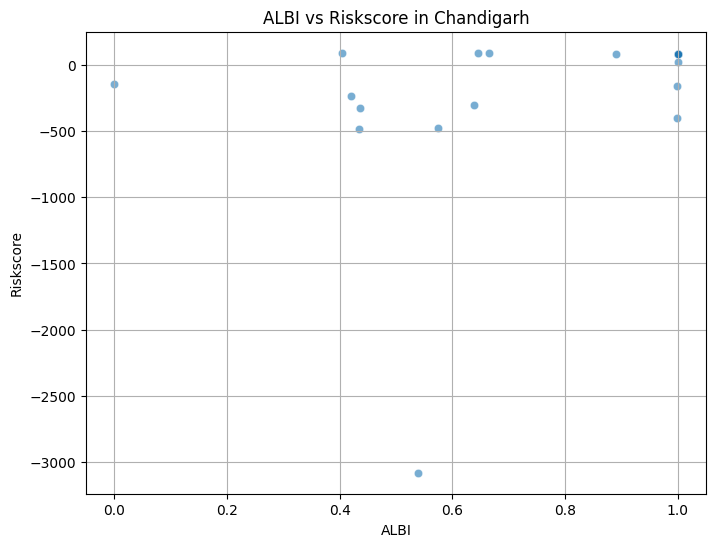

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Chandigarh.


In [134]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ch_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Chandigarh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Chandigarh.")

Correlation Matrix for Chandigarh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.635648        0.544060       0.174723   
age_5_17        0.635648  1.000000        0.632373       0.207145   
age_18_greater  0.544060  0.632373        1.000000       0.241515   
demo_age_5_17   0.174723  0.207145        0.241515       1.000000   
demo_age_17_    0.175662  0.190159        0.214303       0.908861   
bio_age_5_17    0.108064  0.145168        0.166234       0.636300   
bio_age_17_     0.168749  0.182207        0.195992       0.724361   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.175662      0.108064     0.168749  
age_5_17            0.190159      0.145168     0.182207  
age_18_greater      0.214303      0.166234     0.195992  
demo_age_5_17       0.908861      0.636300     0.724361  
demo_age_17_        1.000000      0.577149     0.725929  
bio_age_5_17        0.577149      1.000000     0.863144  
bio_ag

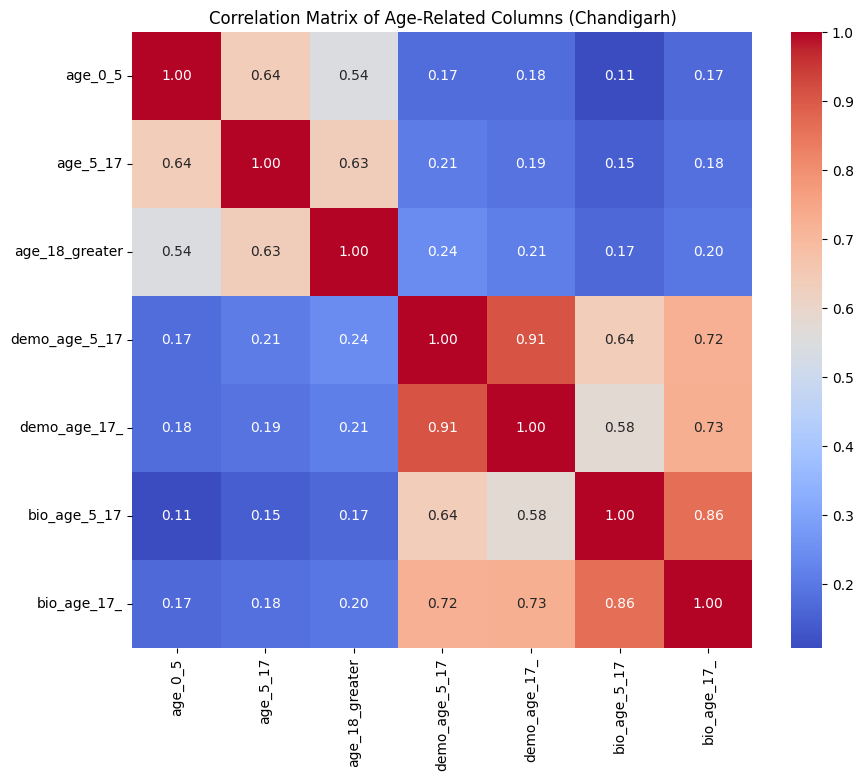

In [126]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_ch = df_ch_merged[numerical_age_cols].corr()

print("Correlation Matrix for Chandigarh:")
print(correlation_matrix_ch)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ch, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Chandigarh)')
plt.show()

District-wise average age-related data for Chandigarh:
     district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  Chandigarh  0.569339  0.058514        0.008582       1.946752   
1      Mohali  0.000000  0.037037        0.000000       0.000000   
2    Rupnagar  0.022222  0.000000        0.000000       0.007407   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0     11.340550     11.065925     7.702945  
1      0.185185      0.222222     0.740741  
2      0.192593      0.303704     0.740741  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        3 non-null      object 
 1   age_0_5         3 non-null      float64
 2   age_5_17        3 non-null      float64
 3   age_18_greater  3 non-null      float64
 4   demo_age_5_17   3 non-null      float64
 5   demo_age_17_    3 non-null      float64
 6   bio_age_5_17    3 non-null 

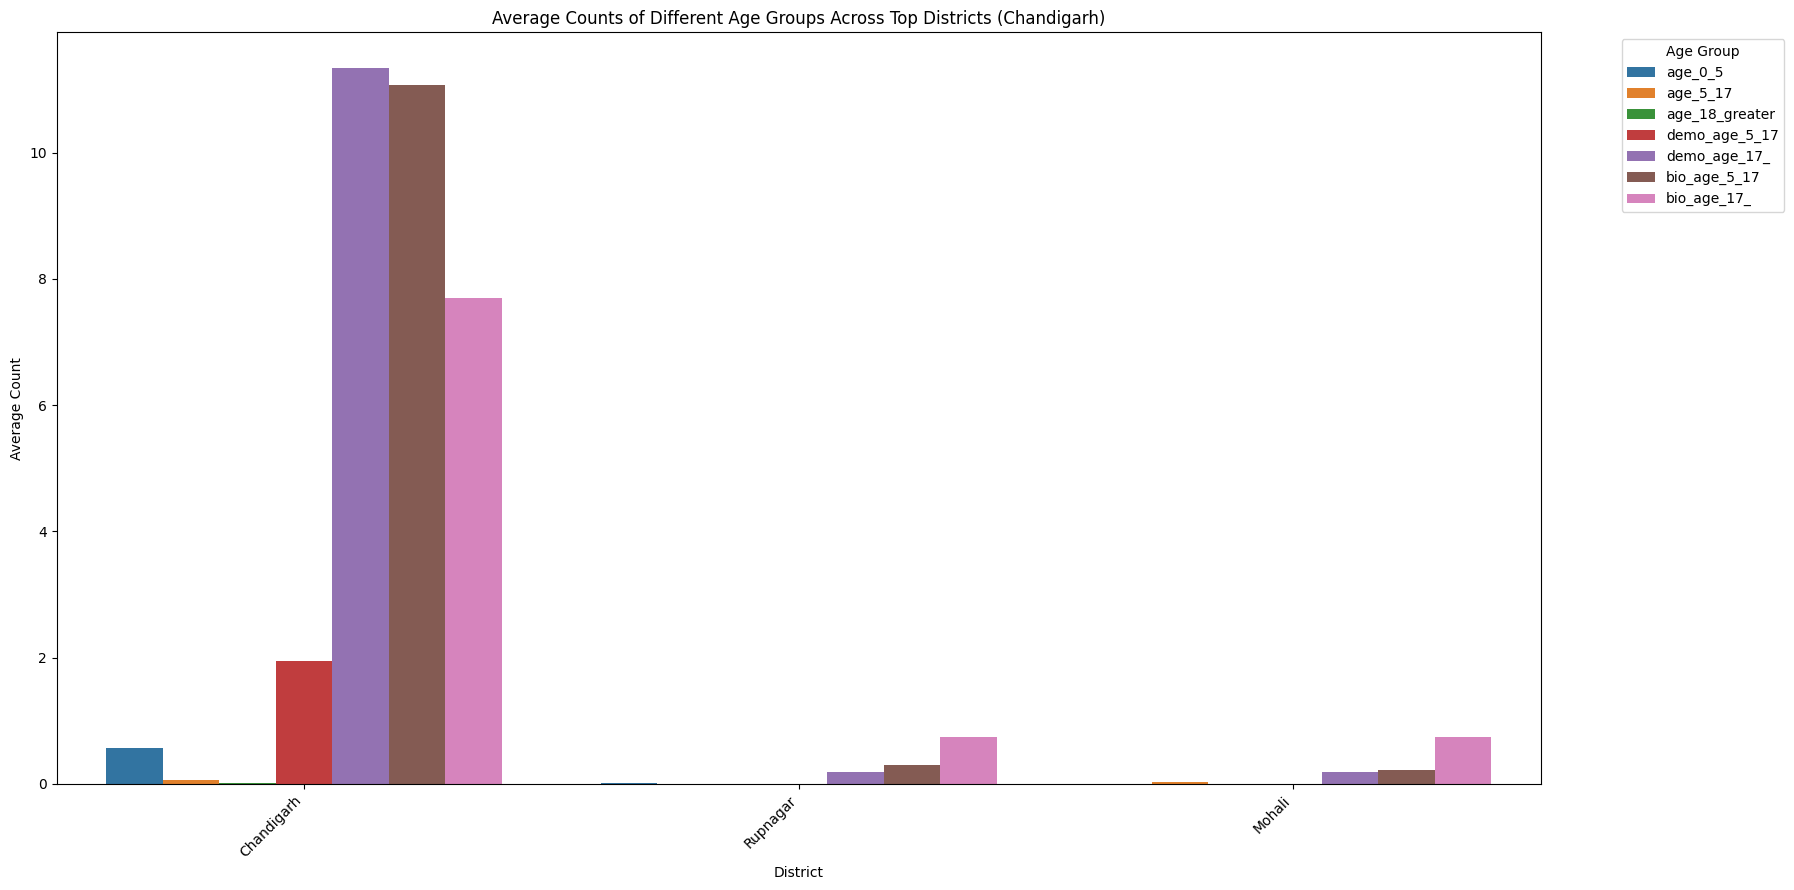

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top districts in Chandigarh, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [127]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_ch_district_mean = df_ch_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Chandigarh:")
print(df_ch_district_mean.head())
print(df_ch_district_mean.info())

df_ch_district_mean['total_avg_age'] = df_ch_district_mean[age_cols_to_group].sum(axis=1)
df_ch_district_mean_top10 = df_ch_district_mean.nlargest(10, 'total_avg_age')

df_ch_district_mean_melted = df_ch_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_ch_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top Districts (Chandigarh)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top districts in Chandigarh, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Chandigarh:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         1172.0        7921.0   
1 2025-04-01     86.0      21.0            10.0         2731.0        7773.0   
2 2025-05-01      0.0       0.0             0.0         1425.0        6135.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0        3053.0       3377.0  
1        4587.0       3334.0  
2        3424.0       3142.0  
3         135.0        221.0  
4         118.0        189.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    dateti

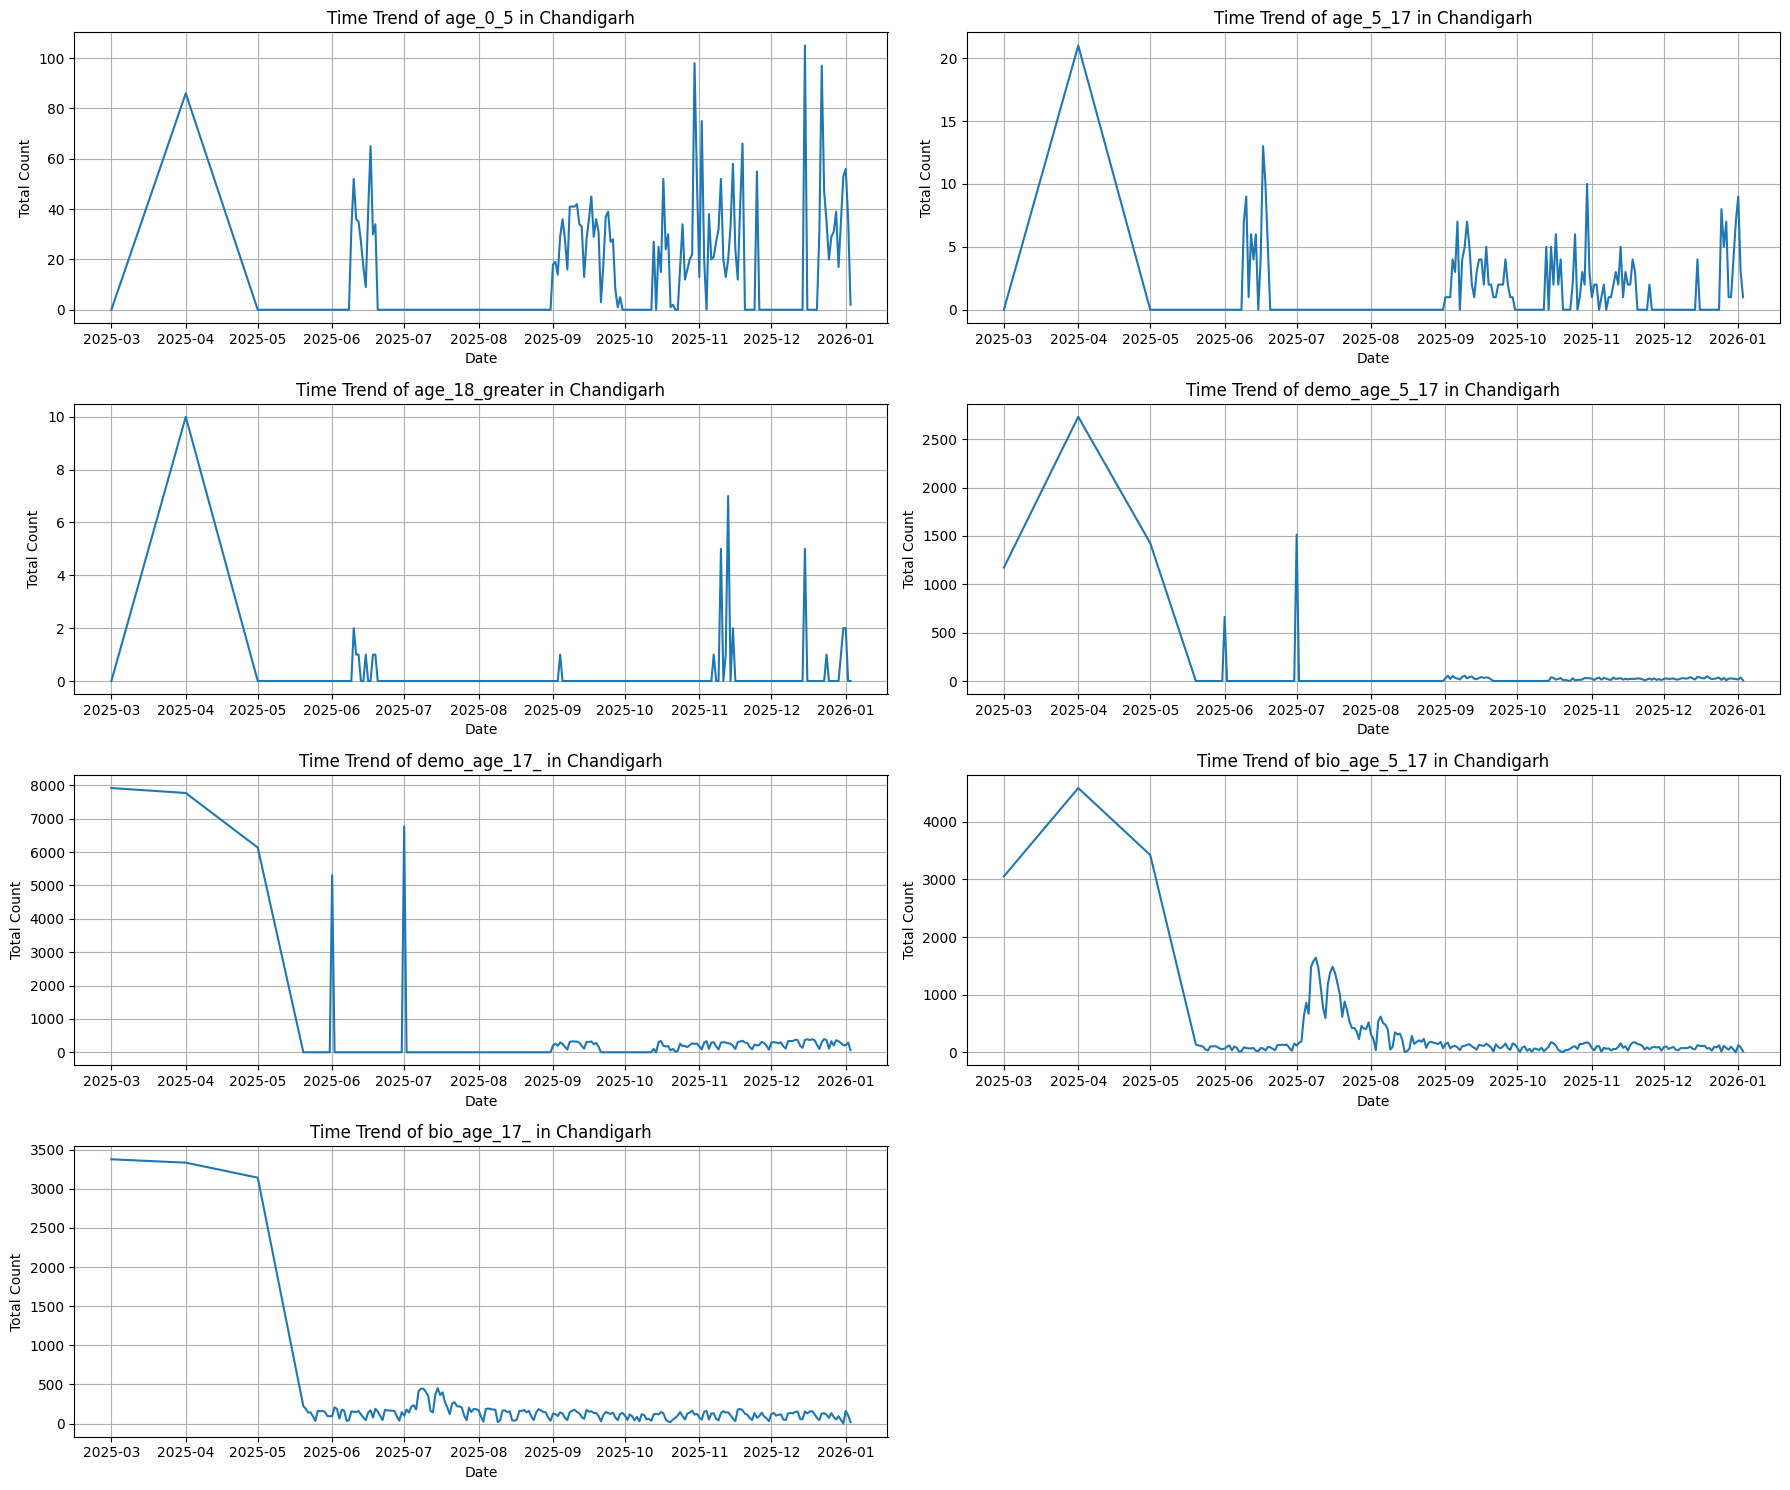

Insight: Line charts for each age-related column over time in Chandigarh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [128]:
df_ch_time_trend = df_ch_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Chandigarh:")
print(df_ch_time_trend.head())
print(df_ch_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_ch_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Chandigarh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Chandigarh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

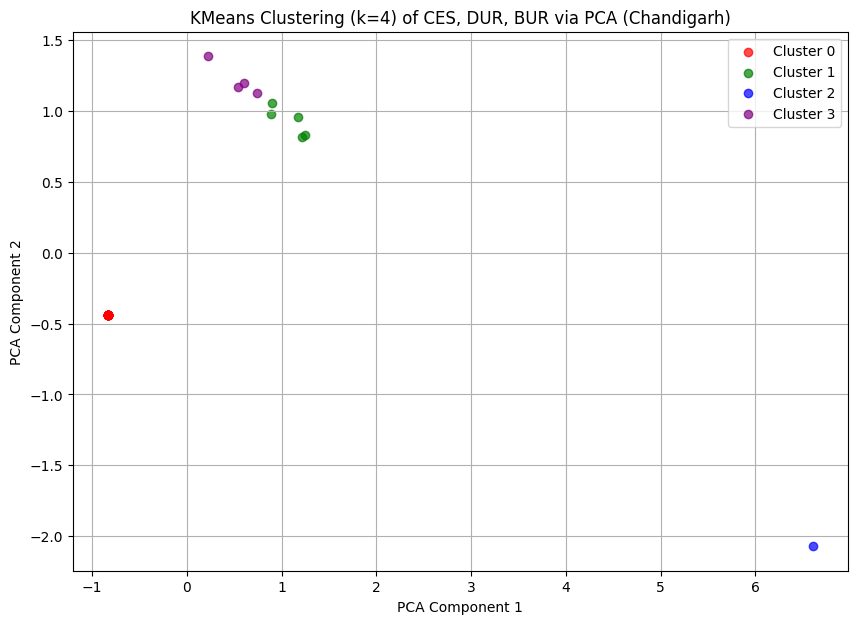

First 5 rows of df_ch_agg with 'clusterlabel' column:
   year  month       state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Chandigarh  Chandigarh      0.0       0.0             0.0   
1  2025      4  Chandigarh  Chandigarh     86.0      21.0            10.0   
2  2025      5  Chandigarh  Chandigarh      0.0       0.0             0.0   
3  2025      5  Chandigarh    Rupnagar      0.0       0.0             0.0   
4  2025      6  Chandigarh  Chandigarh    376.0      64.0             7.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0         1172.0        7921.0        3053.0  ...  0.197736  0.354469   
1         2731.0        7773.0        4587.0  ...  0.243602  0.460148   
2         1425.0        6135.0        4483.0  ...  0.284607  0.334778   
3            0.0           0.0           1.0  ...  0.000123  0.000041   
4          663.0        5313.0        2259.0  ...  0.185216  0.425650   

       ALBI  Enormrisk  CESrisknorm  DURrisk

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_ch_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_ch_agg
df_ch_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_ch_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Chandigarh)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_ch_agg with 'clusterlabel' column:")
print(df_ch_agg.head())

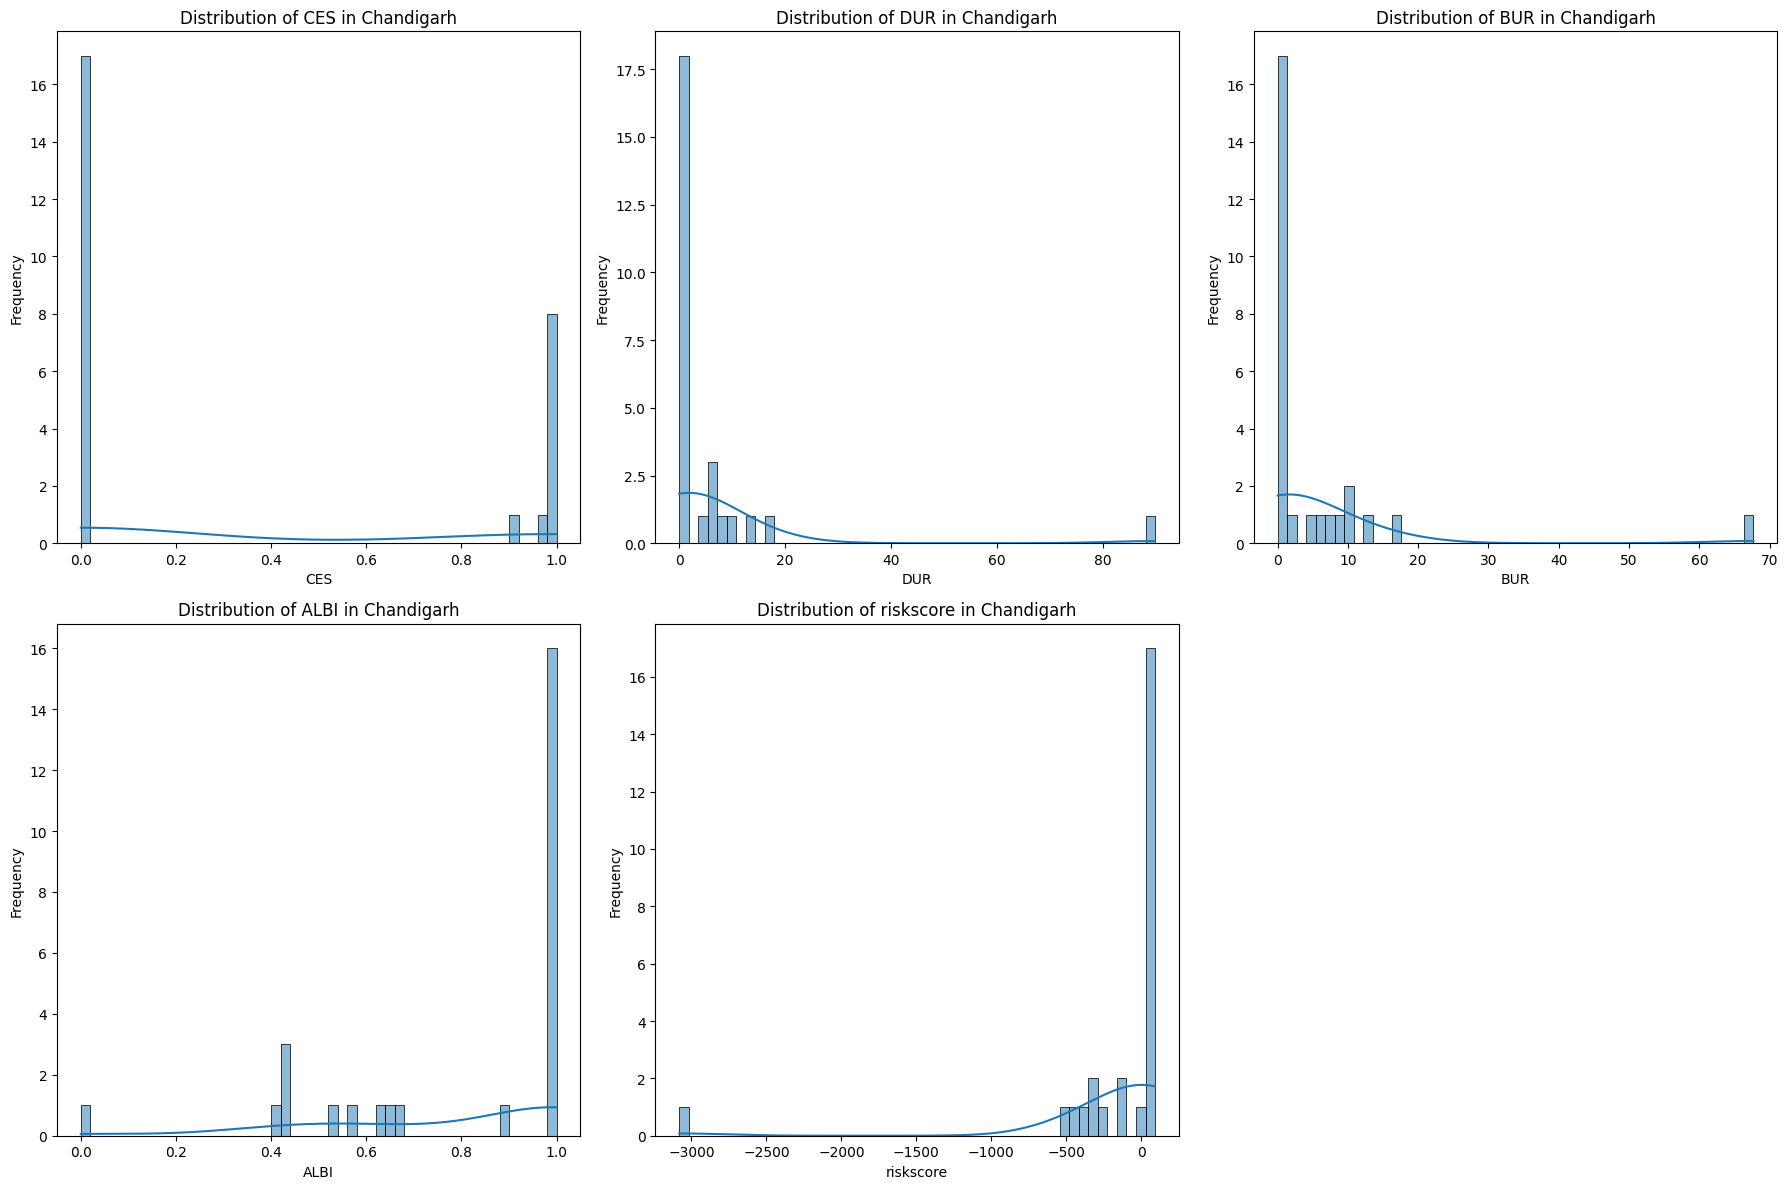

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Chandigarh.


In [136]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ch_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Chandigarh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Chandigarh.")

In [137]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_ch_agg['year'].max()
latest_month = df_ch_agg[df_ch_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_ch_agg for the latest year and month
df_latest_month = df_ch_agg[(df_ch_agg['year'] == latest_year) & (df_ch_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For CES, DUR, BUR, ALBI, top 10 implies best performance, so ascending for ALBI and descending for others
    if metric == 'ALBI':
        top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
        bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10[['district', metric]].to_string(index=False))
    elif metric == 'riskscore':
        # For riskscore, 'top' means highest risk, so ascending=False
        top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
        # For riskscore, 'bottom' means lowest risk, so ascending=True
        bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10[['district', metric]].to_string(index=False))
    else: # For CES, DUR, BUR
        top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
        bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(top_10[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
        print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
  district      CES
Chandigarh 0.981651
  Rupnagar 0.000000

Bottom 10 Districts by CES (Year 2026, Month 1):
  district      CES
  Rupnagar 0.000000
Chandigarh 0.981651

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
  district      DUR
Chandigarh 5.715596
  Rupnagar 0.000000

Bottom 10 Districts by DUR (Year 2026, Month 1):
  district      DUR
  Rupnagar 0.000000
Chandigarh 5.715596

--- Metric: BUR ---

Top 10 Districts by BUR (Year 2026, Month 1):
  district      BUR
Chandigarh 4.688073
  Rupnagar 0.000000

Bottom 10 Districts by BUR (Year 2026, Month 1):
  district      BUR
  Rupnagar 0.000000
Chandigarh 4.688073

--- Metric: ALBI ---

Top 10 Districts by ALBI (Year 2026, Month 1):
  district  ALBI
  Rupnagar   1.0
Chandigarh   0.0

Bottom 10 Districts by ALBI (Year 2026, Month 1):
  district  ALBI
Chandigarh   0.0
  Rupnagar   1.0

--- Metric: risksc

## Summary (Chandigarh):

The Aadhaar lifecycle analysis for Chandigarh provides a detailed view of enrolment and update activities across its districts. The `df_ch_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_ch_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0. The data was then filtered for 'Chandigarh' and aggregated monthly and by district into `df_ch_agg`.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some significantly negative risk scores were observed, such as Chandigarh's -147.706422, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns in Chandigarh (`correlation_matrix_ch`) revealed strong positive correlations within demographic (`demo_age_5_17` and `demo_age_17_` at 0.91) and biometric (`bio_age_5_17` and `bio_age_17_` at 0.86) update categories. Correlations between enrolment figures and update figures were generally weaker, typically below 0.25.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Chandigarh district showed a high CES of 0.981651, indicating most enrolments were for children. Rupnagar had a CES of 0.000000, suggesting no child enrolments were recorded in that period for that specific district.
    *   **DUR (Demographic Update Rate)**: Chandigarh district exhibited a high DUR of 5.715596, while Rupnagar had 0.000000.
    *   **BUR (Biometric Update Rate)**: Chandigarh district recorded a BUR of 4.688073, and Rupnagar had 0.000000.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Rupnagar achieved an ALBI of 1.0, indicating a perfect balance or no activity in the period. Chandigarh had a very low ALBI of 0.0, suggesting an imbalance.
    *   **Risk Score**: Rupnagar had a risk score of 80.000000. Chandigarh, however, showed a significantly negative risk score of -147.706422, highlighting the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Chandigarh's districts.

### Conclusion:

Chandigarh exhibits varied performance in Aadhaar lifecycle management. While Chandigarh district shows high enrolment and update activities, there are disparities in rates and the overall balance of the Aadhaar lifecycle. The consistent observation of problematic `riskscore` values necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on areas with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.